In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [12]:
import model
import train
import utilities

In [6]:
import ast
import os

from collections import Counter, defaultdict

In [8]:
# def fails(func):
#     try:
#         func()
#         return False
#     except:
#         return True

In [9]:
# def read_all(path = "../CodeStylometry/Corpus/temp/codejamfolder/py"):
#     result = {}
#     for handle in os.listdir(path):
#         handle_path = os.path.join(path, handle)
#         result_for_handle = defaultdict(str)
# #         for contest in os.listdir(handle_path):
# #             contest_path = os.path.join(handle_path, contest)
#         for solution in os.listdir(handle_path):
#                 solution_path = os.path.join(handle_path, solution)
#                 with open(solution_path, "r") as f:
#                     try:
#                         result_for_handle[solution] = f.read()
#                     except Exception as e:
#                         print(solution_path)
#                         print(e)
                    
#         result[handle] = result_for_handle
        
#     return result

In [10]:


# def filter_by_count(data, min_count, max_count):
#     result = {}
#     for handle, result_for_handle in data.items():
#         current = {}
#         for problem, solution in result_for_handle.items():
#             if not fails(lambda: ast.parse(solution)):
#                 current[problem.split(".")[0]] = solution


#         if len(current) >= min_count and len(current) <= max_count:
#             result[handle] = current
    
#     return result


In [11]:
data = train.read_all_gcj()

../CodeStylometry/Corpus/temp/codejamfolder/py/smartek0/p2463486.smartek0.py
'utf-8' codec can't decode byte 0xfc in position 111: invalid start byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1481486.RedApe0.py
'utf-8' codec can't decode byte 0xee in position 1204: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1485488.RedApe0.py
'utf-8' codec can't decode byte 0xea in position 1289: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1080487.RedApe0.py
'utf-8' codec can't decode byte 0xf2 in position 1158: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1590487.RedApe0.py
'utf-8' codec can't decode byte 0xef in position 3183: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1480487.RedApe0.py
'utf-8' codec can't decode byte 0xe3 in position 1306: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/apinzonf0/p24481.apinzo

In [14]:
data = utilities.filter_by_count(data, 25, 100)

In [15]:
print(sorted(data.keys()))

['EricStansifer0', 'Nin00', 'RalfKistner0', 'Sp30000', 'ali.assaf0', 'bigOnion0', 'd.operator0', 'damo.yu0', 'dareonion0', 'dennis.lissov0', 'killerrex0', 'mth0', 'pawko0', 'peter.gtz0', 'ronnodas0', 'royf0', 'shaunren0', 'takluyver0']


In [16]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [17]:
batch_sampler.get_n_classes()

18

In [18]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([21, 22, 20, 24, 37, 33, 28, 30, 20, 34, 24, 31, 32, 20, 26, 24, 20,
        20]))

In [19]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 6,  6,  5,  6, 10,  9,  7,  8,  5,  9,  6,  8,  8,  5,  7,  6,  6,
         5]))

In [31]:
# model.NameEmbeddingVisitor()

In [42]:
cls = model.NameModel(batch_sampler.get_n_classes(), embedding_dims=100, name_embedding_dims=100, combiner_dims=200)

In [43]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()))

In [44]:
trainer.train_metrics

defaultdict(list, {})

In [50]:
[name for name, _ in cls.named_parameters()]

['ast_encoder.subtree_network.weight_ih_l0',
 'ast_encoder.subtree_network.weight_hh_l0',
 'ast_encoder.subtree_network.bias_ih_l0',
 'ast_encoder.subtree_network.bias_hh_l0',
 'ast_encoder.embedding_layer.weight',
 'ast_encoder.name_embedding_layer.weight',
 'ast_encoder.name_combiner.0.weight',
 'ast_encoder.name_combiner.0.bias',
 'ast_encoder.name_combiner.2.weight',
 'ast_encoder.name_combiner.2.bias',
 'softmax_head.0.weight',
 'softmax_head.0.bias']

In [36]:
torch.set_num_threads(1)

In [37]:
# cls.preprocessed = False

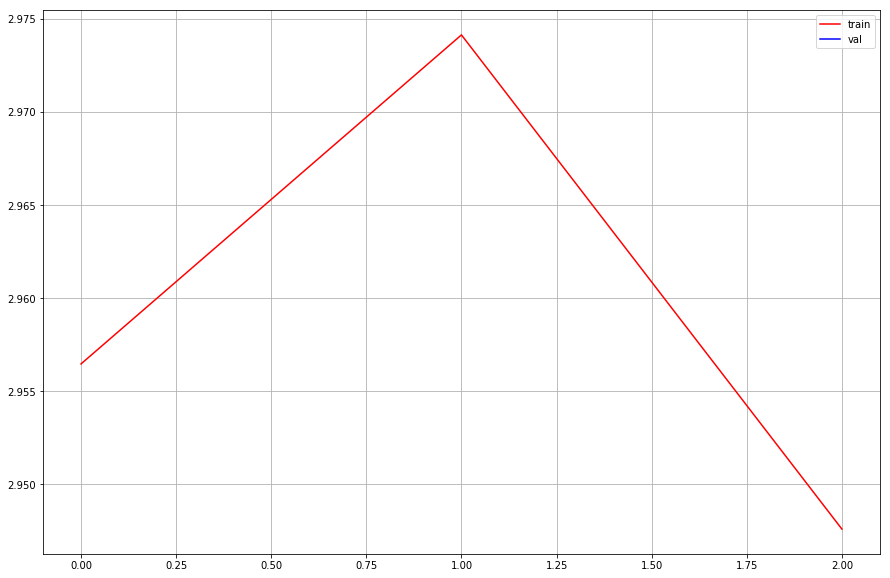

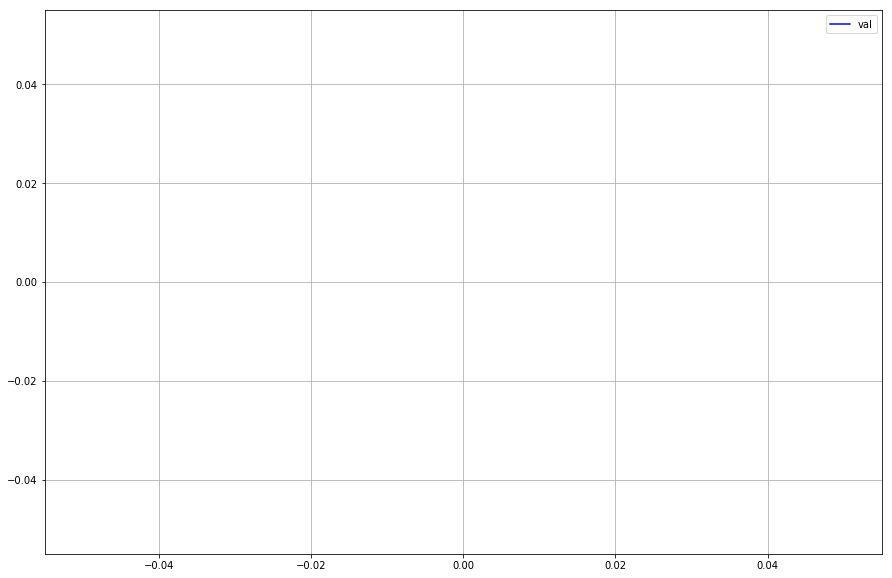

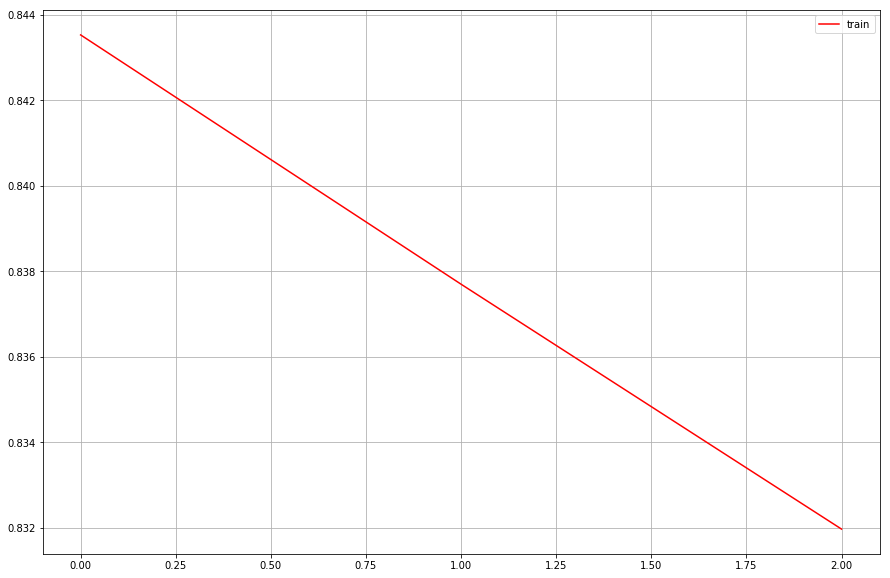

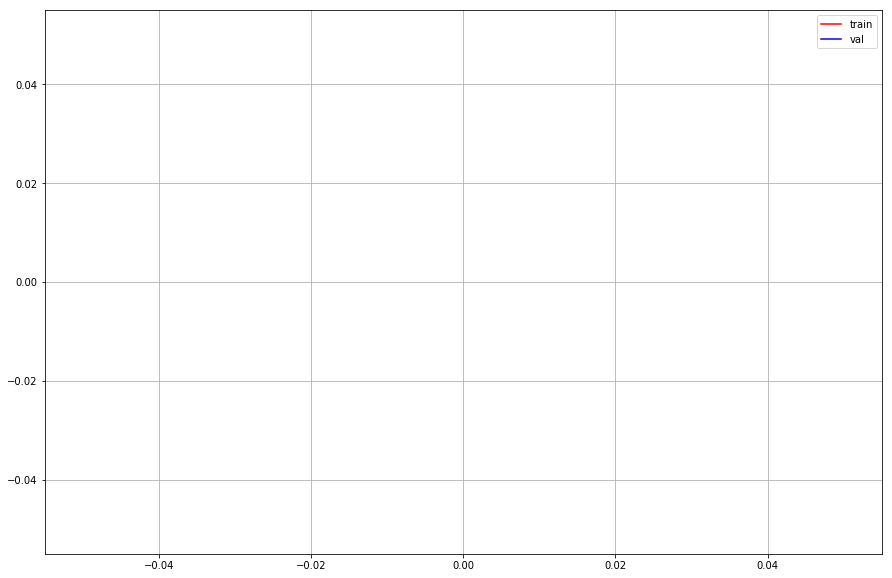

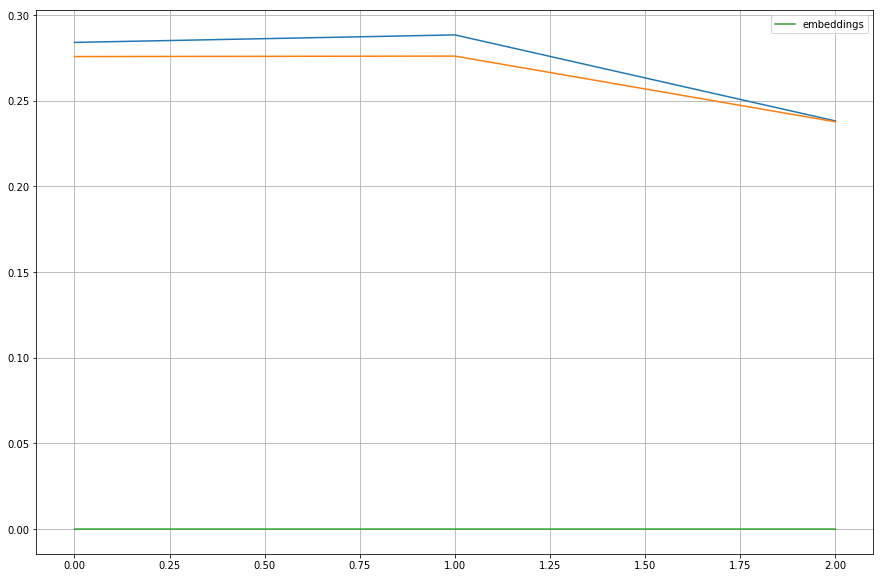

In [ ]:
trainer.train(batch_sampler, {"n_epochs":800})

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
    
#     print(pred)
#     print(true)
#     print(len(true))
    
    accuracy = np.count_nonzero(pred == true.ravel())/len(true)
    print("Accuracy = ", accuracy)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [26]:
import gc
gc.collect()

0

In [27]:
cls.eval()
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

Accuracy =  1.0


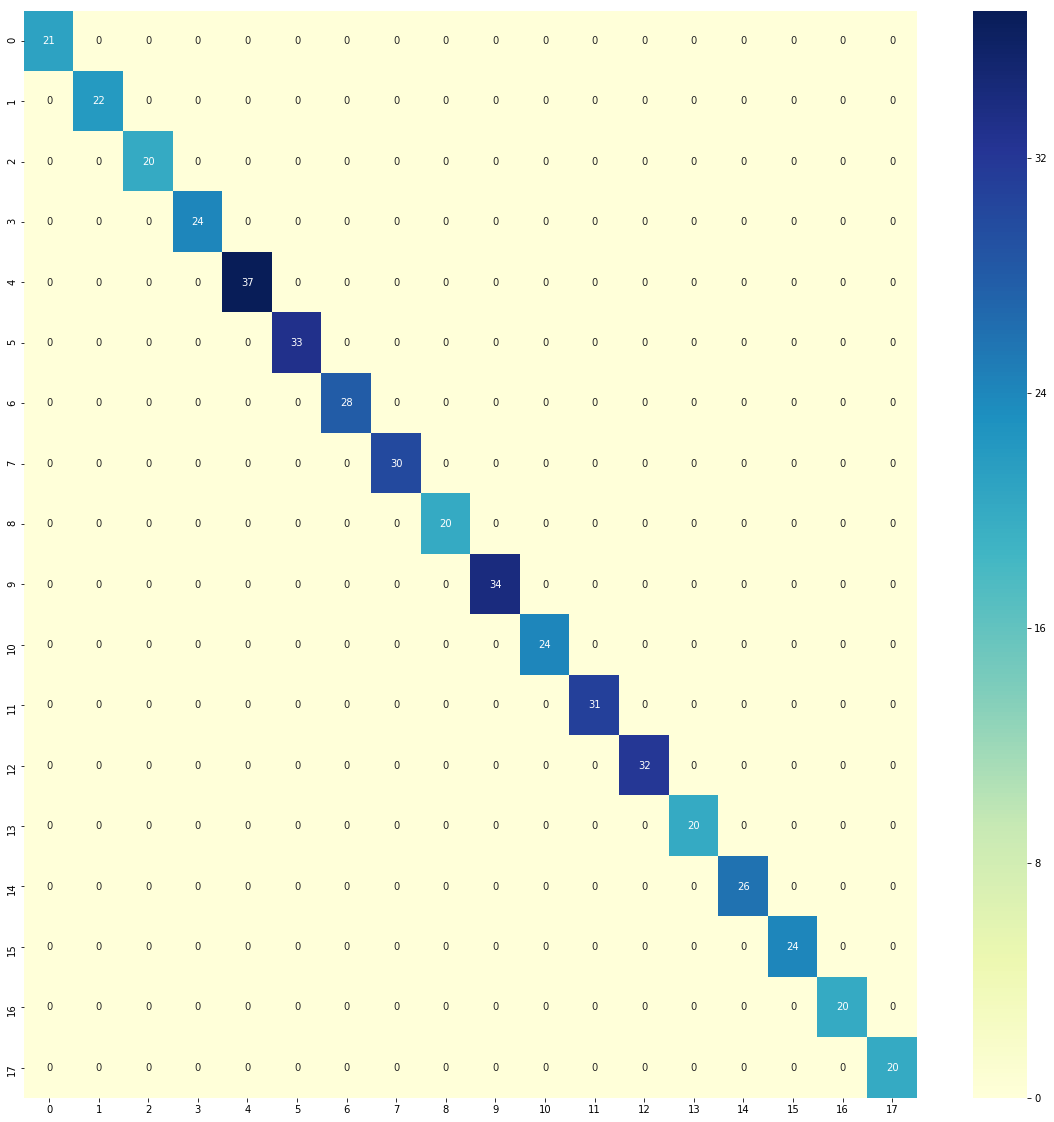

In [28]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [29]:
#cls.eval()
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

Accuracy =  0.8852459016393442


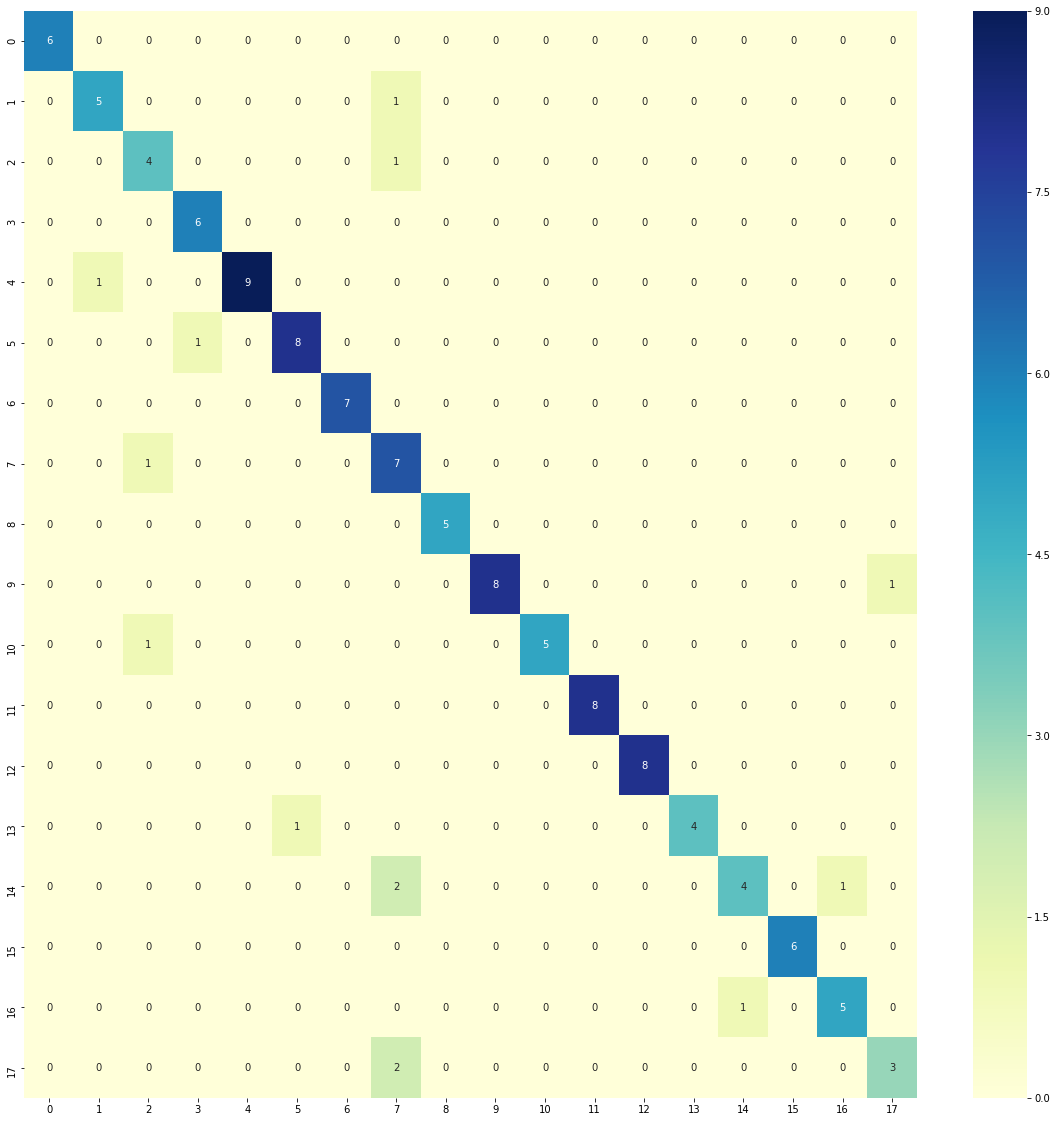

In [30]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [31]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
n_classes = batch_sampler.get_n_classes()
# colors = {0:'r', 1:'g', 2:'b', 3:'c', 4:'y
colors = {i:c for i, c in enumerate(cm.rainbow(np.linspace(0, 1, n_classes)))}
pca = PCA(n_components=2)
x_transformed = cls.transform_batch(batch_sampler.x_train)
x_test_transformed = cls.transform_batch(batch_sampler.x_test)
pca.fit(x_transformed.detach())
def plot_pca(x, y, alpha=1.0):
    plt.figure(figsize=(20, 20))
    plt.scatter(x[:, 0], x[:, 1], color=list(map(colors.get, y)), alpha=alpha)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

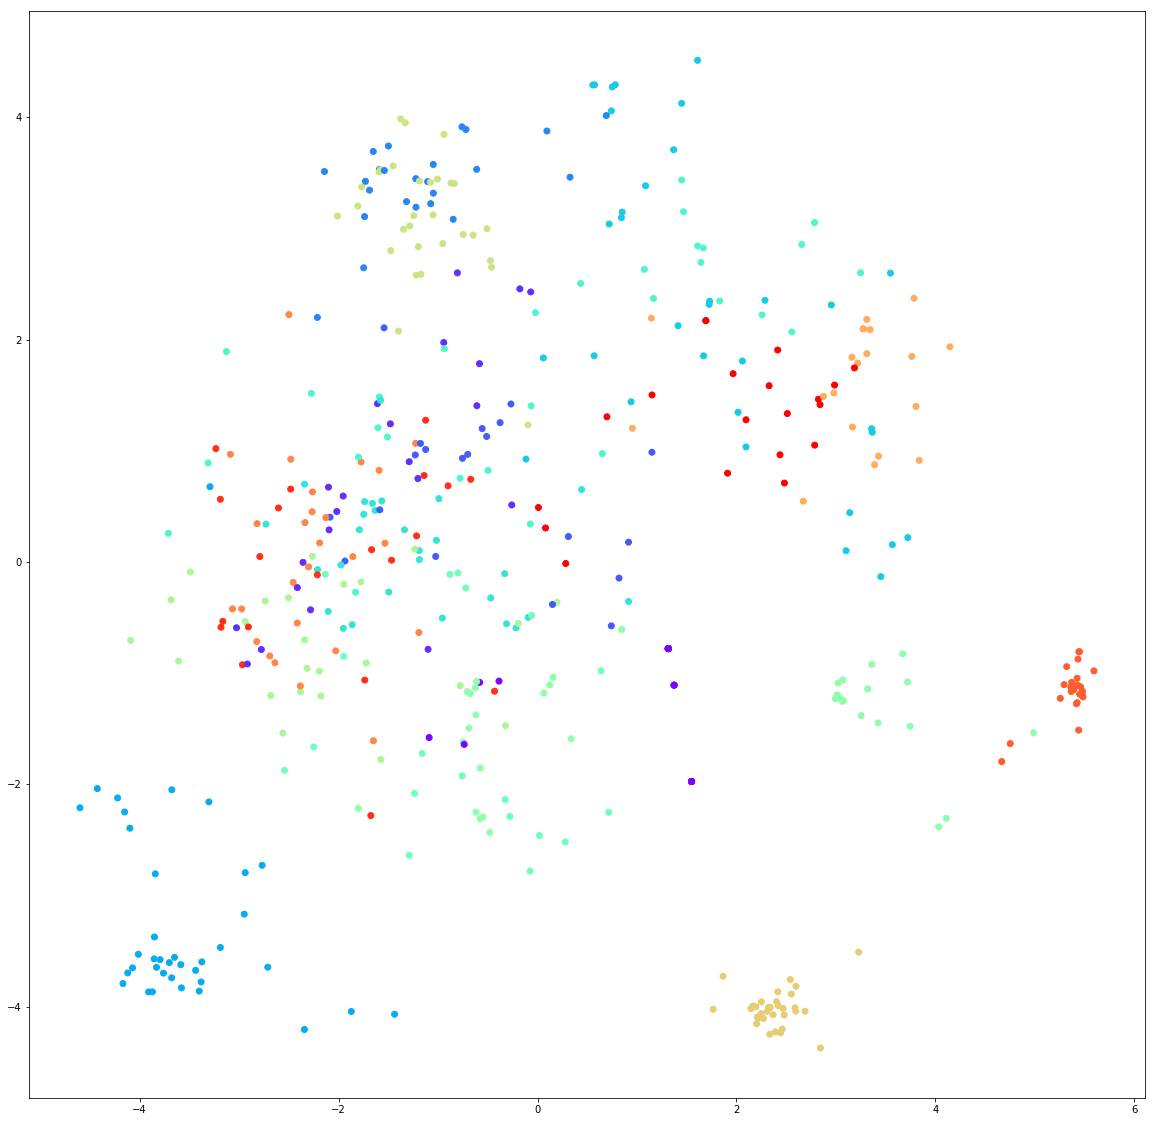

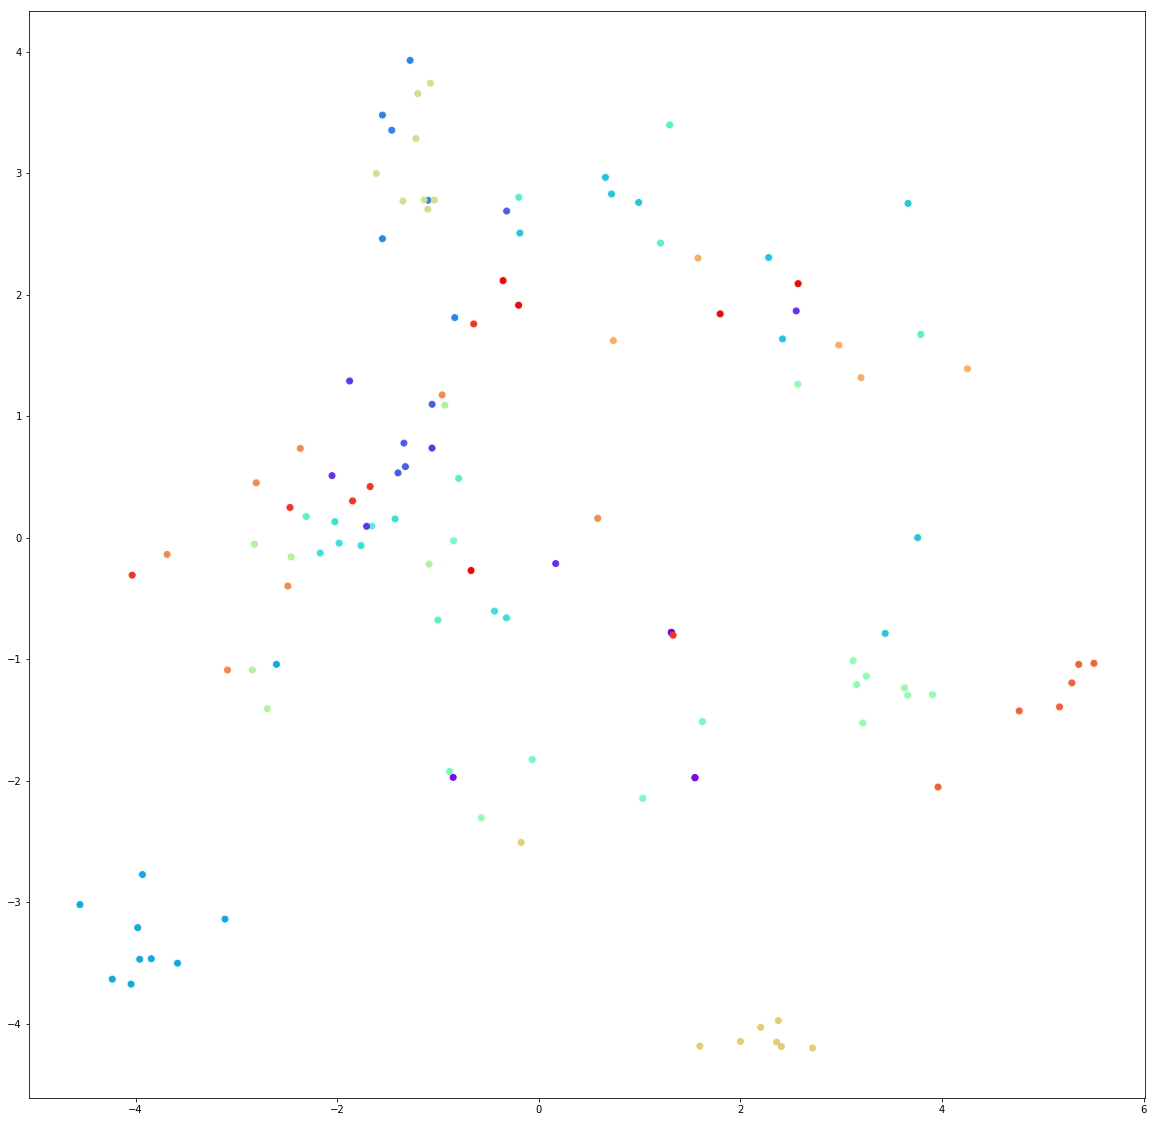

In [32]:
plt.figure(figsize=(20, 20))
plot_pca(pca.transform(x_transformed.detach()), batch_sampler.y_train, alpha=1.0)
plot_pca(pca.transform(x_test_transformed.detach()), batch_sampler.y_test, alpha=1.0)
# plt.show()